In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [22]:
dataset = load_digits()
dataset.data.shape

(1797, 64)

4

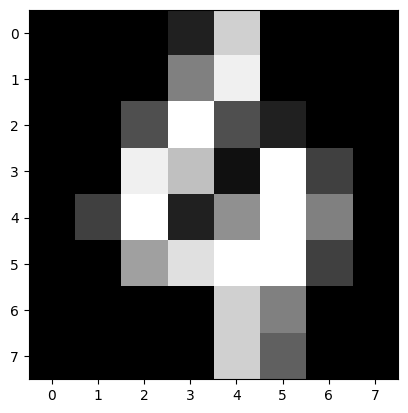

In [23]:
test = 100
img = dataset.images[test]
plt.imshow(img, cmap="gray")
dataset.target[test]

In [24]:
dataset = load_digits()
X = dataset.data
Y = dataset.target

# One-hot encode target
Y = np.eye(10)[Y]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [26]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(X):
    exp_X = np.exp(X - np.max(X, axis=1, keepdims=True))
    return exp_X / np.sum(exp_X, axis=1, keepdims=True)

def root_mean_squared_error(Y_pred, Y_test):
    return np.sqrt(np.mean((Y_pred - Y_test) ** 2))

def calculate_accuracy(Y_pred, Y_true):
    return np.mean(np.argmax(Y_pred, axis=1) == np.argmax(Y_true, axis=1))

In [27]:
# Initialize network parameters
Dimension_input = x_train.shape[1]
Dimension_output = y_train.shape[1]

H1 = 128
H2 = 32

lr = 0.001
epochs = 80

# Initialize weights and biases
W1 = np.random.randn(Dimension_input, H1)
W2 = np.random.randn(H1, H2)
W3 = np.random.randn(H2, Dimension_output)

B1 = np.random.randn(1, H1)
B2 = np.random.randn(1, H2)
B3 = np.random.randn(1, Dimension_output)

accuracy_train_list, accuracy_test_list = [], []
loss_train_list, loss_test_list = [], []

In [28]:
# Training loop
for epoch in range(epochs):
    # Forward pass for the entire dataset (vectorized)
    Z1 = sigmoid(np.dot(x_train, W1) + B1)
    Z2 = sigmoid(np.dot(Z1, W2) + B2)
    Y_pred_train = softmax(np.dot(Z2, W3) + B3)
    
    # Backward pass (vectorized)
    error = Y_pred_train - y_train
    
    grad_W3 = np.dot(Z2.T, error)
    grad_B3 = np.sum(error, axis=0, keepdims=True)

    error = np.dot(error, W3.T) * Z2 * (1 - Z2)
    grad_W2 = np.dot(Z1.T, error)
    grad_B2 = np.sum(error, axis=0, keepdims=True)

    error = np.dot(error, W2.T) * Z1 * (1 - Z1)
    grad_W1 = np.dot(x_train.T, error)
    grad_B1 = np.sum(error, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= lr * grad_W1
    B1 -= lr * grad_B1
    W2 -= lr * grad_W2
    B2 -= lr * grad_B2
    W3 -= lr * grad_W3
    B3 -= lr * grad_B3

    # Evaluate training loss and accuracy
    loss_train = root_mean_squared_error(Y_pred_train, y_train)
    accuracy_train = calculate_accuracy(Y_pred_train, y_train)

    # Forward pass for the test set
    Z1_test = sigmoid(np.dot(x_test, W1) + B1)
    Z2_test = sigmoid(np.dot(Z1_test, W2) + B2)
    Y_pred_test = softmax(np.dot(Z2_test, W3) + B3)

    # Evaluate test loss and accuracy
    loss_test = root_mean_squared_error(Y_pred_test, y_test)
    accuracy_test = calculate_accuracy(Y_pred_test, y_test)

    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)
    loss_train_list.append(loss_train)
    loss_test_list.append(loss_test)

    print(f"Epoch {epoch+1}/{epochs} - loss train: {loss_train:.4f}, accuracy train: {accuracy_train:.4f}")
    print(f"                  loss test: {loss_test:.4f}, accuracy test: {accuracy_test:.4f}")

print("\n\nTraining Completed!")

Epoch 1/80 - loss train: 0.3453, accuracy train: 0.1406
                  loss test: 0.3476, accuracy test: 0.1306
Epoch 2/80 - loss train: 0.3442, accuracy train: 0.1371
                  loss test: 0.3092, accuracy test: 0.1917
Epoch 3/80 - loss train: 0.3068, accuracy train: 0.1990
                  loss test: 0.3044, accuracy test: 0.2333
Epoch 4/80 - loss train: 0.2967, accuracy train: 0.2637
                  loss test: 0.2935, accuracy test: 0.2500
Epoch 5/80 - loss train: 0.2869, accuracy train: 0.2944
                  loss test: 0.2878, accuracy test: 0.3139
Epoch 6/80 - loss train: 0.2825, accuracy train: 0.3166
                  loss test: 0.2878, accuracy test: 0.2944
Epoch 7/80 - loss train: 0.2803, accuracy train: 0.3424
                  loss test: 0.2839, accuracy test: 0.3667
Epoch 8/80 - loss train: 0.2792, accuracy train: 0.3542
                  loss test: 0.2739, accuracy test: 0.3639
Epoch 9/80 - loss train: 0.2669, accuracy train: 0.4245
                  loss t

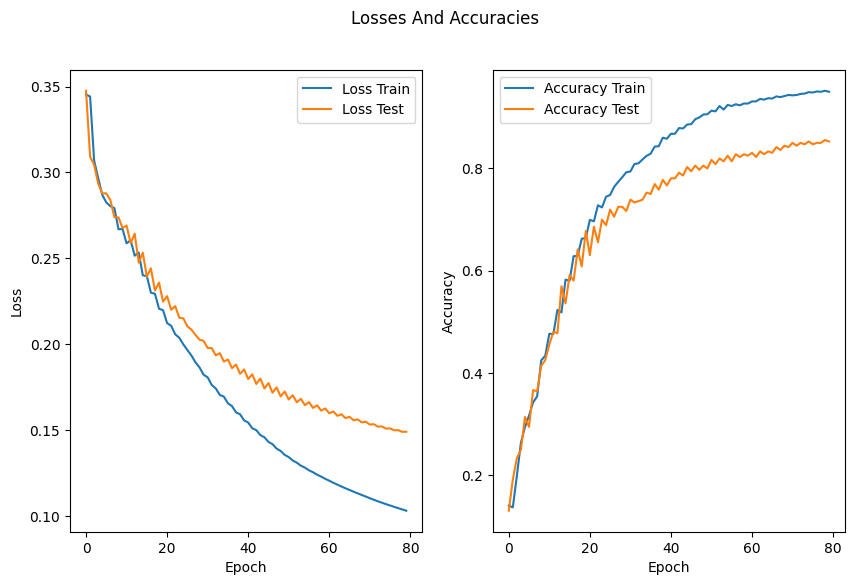

In [30]:
# Plot Losses and Accuracies
plt.figure(figsize=(10, 6))
plt.suptitle("Losses And Accuracies")

plt.subplot(1, 2, 2)
plt.plot(accuracy_train_list, label="Accuracy Train")
plt.plot(accuracy_test_list, label="Accuracy Test")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 1)
plt.plot(loss_train_list, label="Loss Train")
plt.plot(loss_test_list, label="Loss Test")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

plt.show()